In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Datasets.csv")


In [3]:
data['Brand'] = data['Brand'].str.split().str[0].str.title()


In [4]:
brands = data['Brand'].unique()
models = {}

Training model for brand: Apple

Stacking results for brand Apple:
  Train MSE: 722.86, Train R²: 0.99
  Test MSE: 6387.42, Test R²: 0.94
Model and scaler for Apple saved.


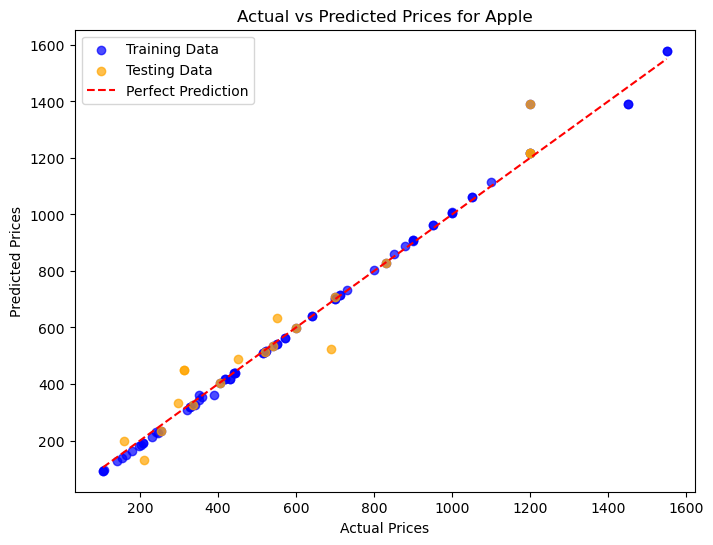

Training model for brand: Asus

Stacking results for brand Asus:
  Train MSE: 78798.59, Train R²: 0.64
  Test MSE: 11003.68, Test R²: 0.89
Model and scaler for Asus saved.


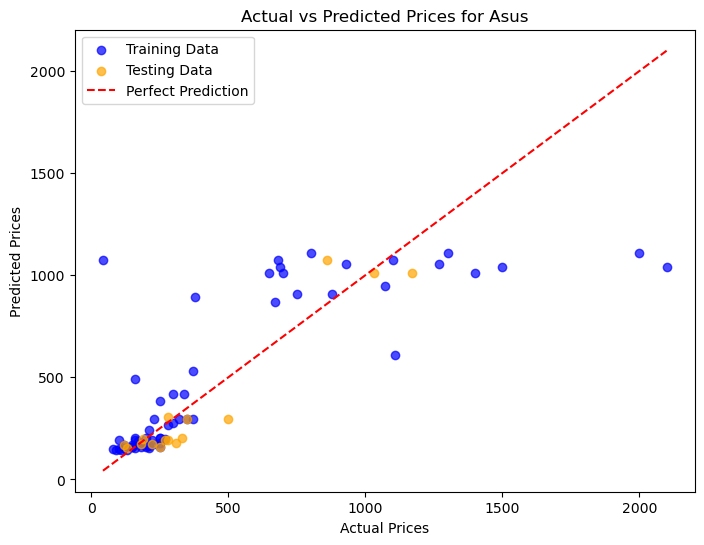

Training model for brand: Alcatel

Stacking results for brand Alcatel:
  Train MSE: 92.12, Train R²: 0.97
  Test MSE: 771.26, Test R²: 0.82
Model and scaler for Alcatel saved.


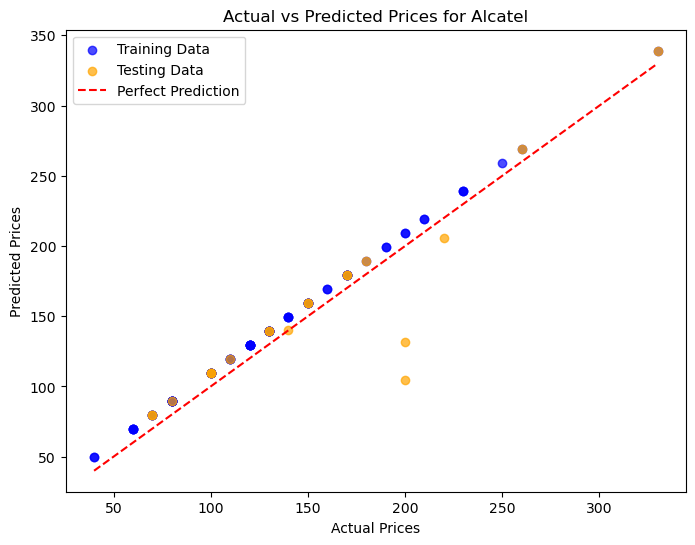

Training model for brand: Samsung

Stacking results for brand Samsung:
  Train MSE: 1339.01, Train R²: 0.97
  Test MSE: 94854.12, Test R²: 0.59
Model and scaler for Samsung saved.


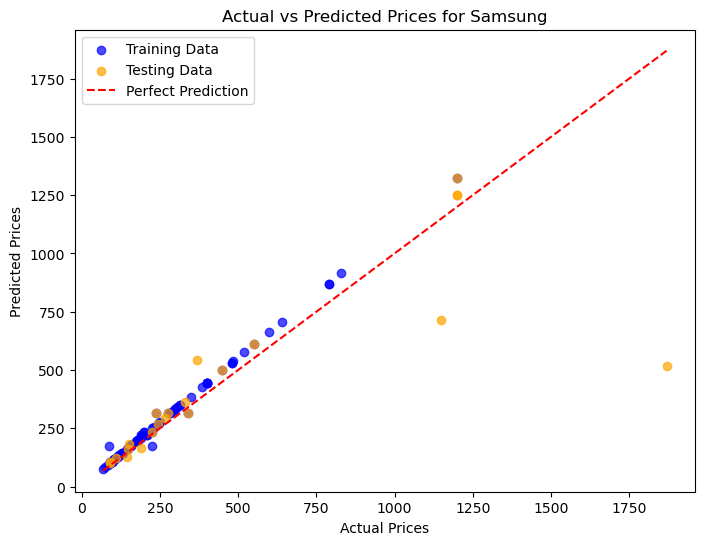

Training model for brand: Xiaomi

Stacking results for brand Xiaomi:
  Train MSE: 649.19, Train R²: 0.98
  Test MSE: 11238.80, Test R²: 0.85
Model and scaler for Xiaomi saved.


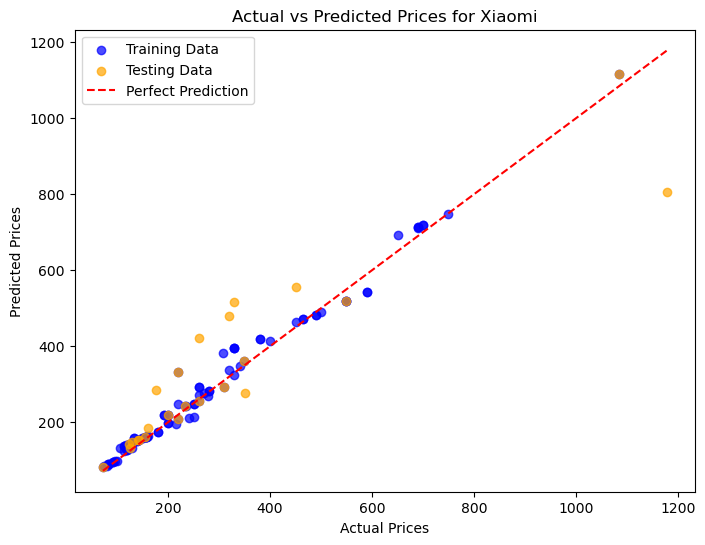

Training model for brand: Oppo

Stacking results for brand Oppo:
  Train MSE: 302.59, Train R²: 0.99
  Test MSE: 10657.28, Test R²: 0.64
Model and scaler for Oppo saved.


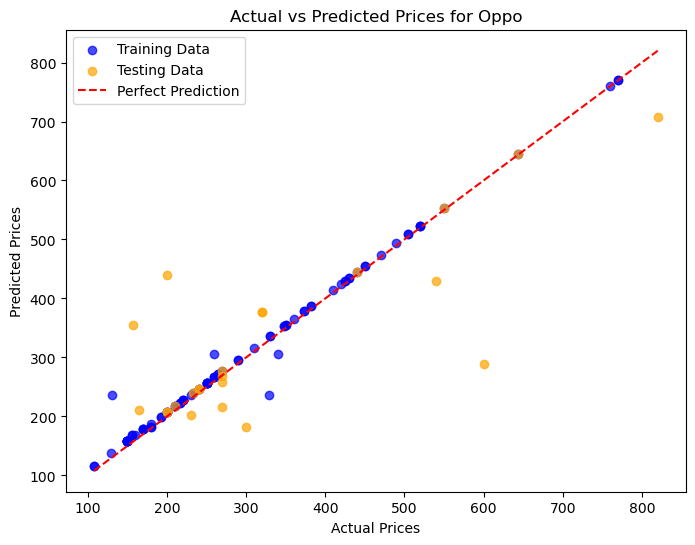

Training model for brand: Huawei

Stacking results for brand Huawei:
  Train MSE: 4259.54, Train R²: 0.97
  Test MSE: 42879.77, Test R²: 0.63
Model and scaler for Huawei saved.


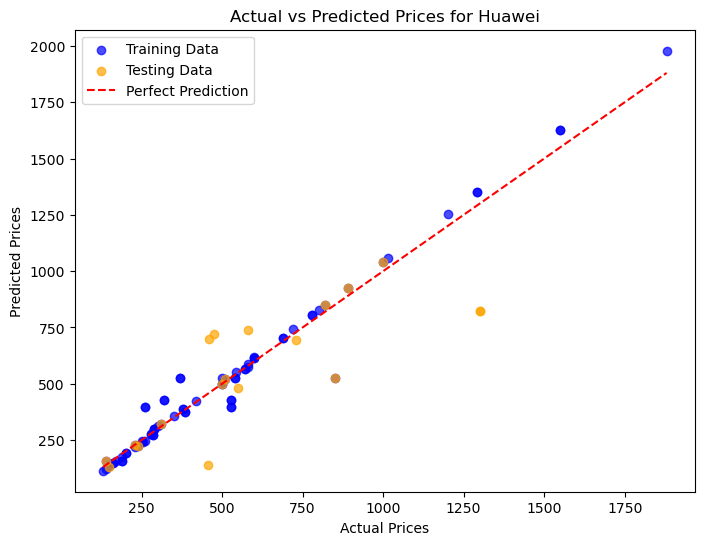

Training model for brand: Realme

Stacking results for brand Realme:
  Train MSE: 276.11, Train R²: 0.99
  Test MSE: 6739.78, Test R²: 0.73
Model and scaler for Realme saved.


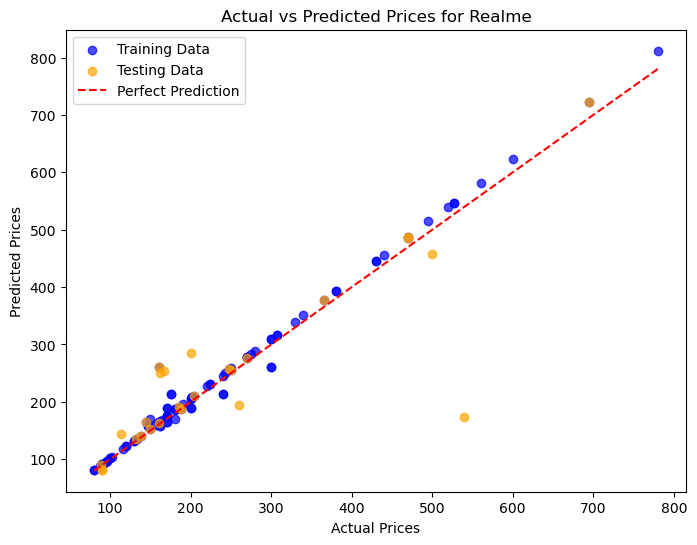

In [6]:

for brand in brands:
    print(f"Training model for brand: {brand}")
    
    brand_data = data[data['Brand'] == brand]
    X_brand = brand_data.drop(columns=['Brand', 'Price (USD)'])  
    y_brand = brand_data['Price (USD)']  
    
    scaler = StandardScaler()
    X_brand_scaled = scaler.fit_transform(X_brand)
    
    X_train, X_test, y_train, y_test = train_test_split(X_brand_scaled, y_brand, test_size=0.2, random_state=42)
    
    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 10, 15, 20],  
        'weights': ['uniform', 'distance'],              
        'p': [1, 2, 3] 
    }
    knn = KNeighborsRegressor()
    grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search_knn.fit(X_train, y_train)
    
    param_grid_dt = {
        'max_depth': [3, 5, 10, None],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4]    
    }
    dt = DecisionTreeRegressor(random_state=42)
    grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search_dt.fit(X_train, y_train)
    
    best_knn = grid_search_knn.best_estimator_
    best_dt = grid_search_dt.best_estimator_
    
    meta_model = LinearRegression()  
    stacking_model = StackingRegressor(
        estimators=[('knn', best_knn), ('dt', best_dt)],
        final_estimator=meta_model
    )
    
    # Huấn luyện mô hình Stacking
    stacking_model.fit(X_train, y_train)
    
    y_train_pred = stacking_model.predict(X_train)
    y_test_pred = stacking_model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"\nStacking results for brand {brand}:")
    print(f"  Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}")
    print(f"  Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}")
    
    # Lưu mô hình Stacking và scaler
    stacking_model_filename = f'{brand}_stacking_model.pkl'
    scaler_filename = f'{brand}_scaler.pkl'
    joblib.dump(stacking_model, stacking_model_filename)
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler for {brand} saved.")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue', label='Training Data')
    plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label='Testing Data')
    plt.plot([y_brand.min(), y_brand.max()], [y_brand.min(), y_brand.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices for {brand}')
    plt.legend()
    plt.show()
   
